In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import sklearn

### Line Search Newton's Method

In [16]:
def f(x):
    return 0.2 * np.square(x) - np.sin(x)

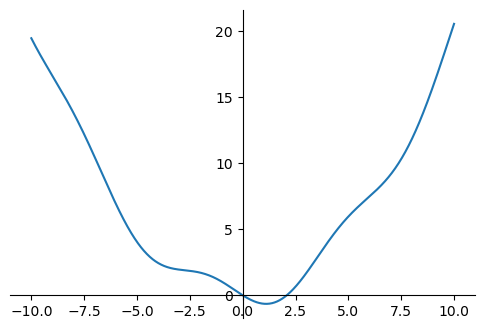

In [19]:
x = np.linspace(-10, 10, 1000)

# Create a figure and an axis
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(x, f(x))
ax.spines['bottom'].set_position('zero') # Y-axis
ax.spines['left'].set_position('zero')   # Z-axis (front spine)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



## Newton's Method

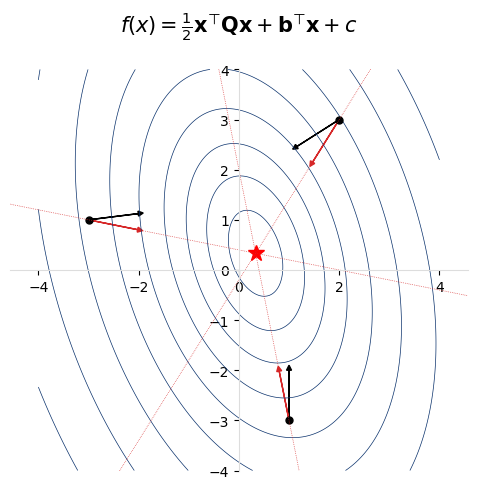

In [67]:
# Newton's method and Gradient Descent
Q = np.array([[5, 1],
              [1, 2]])
b = np.array([[-2, -1]])
c = 3

def f(x1, x2): return 0.5 * (Q[0, 0] * x1**2 + (Q[1, 0] + Q[0, 1]) * x1 * x2 + Q[1, 1] * x2**2) + b[0, 0] * x1 + b[0, 1] * x2 + c
def grad(x): return Q @ x + b.T
def hess(x): return Q

# Minimum
xmin = np.linalg.solve(Q, -b.T)

# Generate data for plotting
x1 = np.linspace(-4, 4, 500)
x2 = np.linspace(-4, 4, 500)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
contours = ax.contour(X1, X2, Z, levels=np.logspace(-1, 5.5, 40),
                      cmap='Blues_r', linewidths=0.5)
ax.plot(xmin[0, 0], xmin[1, 0], 'r*', markersize=12)
ax.axis('equal')

# Pos 1
_x1 = np.array([[2, 3]]).T
_g1 = grad(_x1)
_g1n = _g1 / np.linalg.norm(_g1)
_d1 = - np.linalg.solve(Q, _g1)
_d1n = _d1 / np.linalg.norm(_d1)

# Gradient line
_x = _x1[0, 0] + _g1n[0, 0] * np.array([-30, 30])
_y = _x1[1, 0] + _g1n[1, 0] * np.array([-30, 30])
ax.plot(_x1[0, 0], _x1[1, 0], 'black', marker='o', markersize=5)
# ax.plot(_x, _y, 'black', lw=0.5, linestyle=':')
ax.arrow(_x1[0, 0], _x1[1, 0], -_g1n[0, 0], -_g1n[1, 0],
         head_width=0.1, head_length=0.1, fc='black', ec='black')

# Newton's direction line
_x = _x1[0, 0] + _d1n[0, 0] * np.array([-30, 30])
_y = _x1[1, 0] + _d1n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x1[0, 0], _x1[1, 0], _d1n[0, 0], _d1n[1, 0],
         head_width=0.1, head_length=0.1, fc='tab:red', ec='tab:red')

# Pos 2
_x2 = np.array([[-3, 1]]).T
_g2 = grad(_x2)
_g2n = _g2 / np.linalg.norm(_g2)
_d2 = - np.linalg.solve(Q, _g2)
_d2n = _d2 / np.linalg.norm(_d2)

# Gradient line
_x = _x2[0, 0] + _g2n[0, 0] * np.array([-30, 30])
_y = _x2[1, 0] + _g2n[1, 0] * np.array([-30, 30])
ax.plot(_x2[0, 0], _x2[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x2[0, 0], _x2[1, 0], -_g2n[0, 0], -_g2n[1, 0],
         head_width=0.1, head_length=0.1, fc='black', ec='black')

# Newton's direction line
_x = _x2[0, 0] + _d2n[0, 0] * np.array([-30, 30])
_y = _x2[1, 0] + _d2n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x2[0, 0], _x2[1, 0], _d2n[0, 0], _d2n[1, 0],
         head_width=0.1, head_length=0.1, fc='tab:red', ec='tab:red')

# Pos 3
_x3 = np.array([[1, -3]]).T
_g3 = grad(_x3)
_g3n = _g3 / np.linalg.norm(_g3)
_d3 = - np.linalg.solve(Q, _g3)
_d3n = _d3 / np.linalg.norm(_d3)

# Gradient line
_x = _x3[0, 0] + _g3n[0, 0] * np.array([-30, 30])
_y = _x3[1, 0] + _g3n[1, 0] * np.array([-30, 30])
ax.plot(_x3[0, 0], _x3[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x3[0, 0], _x3[1, 0], -_g3n[0, 0], -_g3n[1, 0],
         head_width=0.1, head_length=0.1, fc='black', ec='black')

# Newton's direction line
_x = _x3[0, 0] + _d3n[0, 0] * np.array([-30, 30])
_y = _x3[1, 0] + _d3n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x3[0, 0], _x3[1, 0], _d3n[0, 0], _d3n[1, 0],
         head_width=0.1, head_length=0.1, fc='tab:red', ec='tab:red')

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

# x and y limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Title
ax.set_title(r'$f(x) = \frac{1}{2}\mathbf{x}^\top\mathbf{Q}\mathbf{x} + \mathbf{b}^\top\mathbf{x} + c$' + '\n ',
             fontsize=15)

plt.tight_layout()

fig.savefig('newton_vs_gradient_descent.png', dpi=300, bbox_inches='tight')
fig.savefig('newton_vs_gradient_descent.pdf', dpi=300, bbox_inches='tight')

In [6]:
import aladaopt

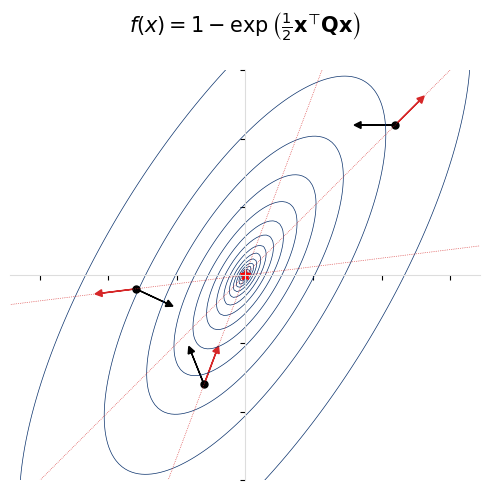

In [151]:
# Newton's method and Gradient Descent
Q = np.array([[5, 1],
              [1, 2]])
b = np.array([[-2, -1]])
c = 3

def f1(x1, x2): return 0.5 * (Q[0, 0] * x1**2 + (Q[1, 0] + Q[0, 1]) * x1 * x2 + Q[1, 1] * x2**2) + b[0, 0] * x1 + b[0, 1] * x2 + c
def grad1(x): return Q @ x + b.T
def hess1(x): return Q

# Minimum
xmin = np.linalg.solve(Q, -b.T)


fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(121)
# # Generate data for plotting
# x1 = np.linspace(-4, 4, 500)
# x2 = np.linspace(-4, 4, 500)
# X1, X2 = np.meshgrid(x1, x2)
# Z = f1(X1, X2)
# contours = ax.contour(X1, X2, Z, levels=np.logspace(-1, 5.5, 40),
#                       cmap='Blues_r', linewidths=0.5)
# ax.plot(xmin[0, 0], xmin[1, 0], 'r*', markersize=12)
# ax.axis('equal')

# # Pos 1
# _x1 = np.array([[2, 3]]).T
# _g1 = grad1(_x1)
# _g1n = _g1 / np.linalg.norm(_g1)
# _d1 = - np.linalg.solve(Q, _g1)
# _d1n = _d1 / np.linalg.norm(_d1)

# # Gradient line
# _x = _x1[0, 0] + _g1n[0, 0] * np.array([-30, 30])
# _y = _x1[1, 0] + _g1n[1, 0] * np.array([-30, 30])
# ax.plot(_x1[0, 0], _x1[1, 0], 'black', marker='o', markersize=5)
# # ax.plot(_x, _y, 'black', lw=0.5, linestyle=':')
# ax.arrow(_x1[0, 0], _x1[1, 0], -_g1n[0, 0], -_g1n[1, 0],
#          head_width=0.2, head_length=0.1, fc='black', ec='black')

# # Newton's direction line
# _x = _x1[0, 0] + _d1n[0, 0] * np.array([-30, 30])
# _y = _x1[1, 0] + _d1n[1, 0] * np.array([-30, 30])
# ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
# ax.arrow(_x1[0, 0], _x1[1, 0], _d1n[0, 0], _d1n[1, 0],
#          head_width=0.2, head_length=0.1, fc='tab:red', ec='tab:red')

# # Pos 2
# _x2 = np.array([[-3, 1]]).T
# _g2 = grad1(_x2)
# _g2n = _g2 / np.linalg.norm(_g2)
# _d2 = - np.linalg.solve(Q, _g2)
# _d2n = _d2 / np.linalg.norm(_d2)

# # Gradient line
# _x = _x2[0, 0] + _g2n[0, 0] * np.array([-30, 30])
# _y = _x2[1, 0] + _g2n[1, 0] * np.array([-30, 30])
# ax.plot(_x2[0, 0], _x2[1, 0], 'black', marker='o', markersize=5)
# ax.arrow(_x2[0, 0], _x2[1, 0], -_g2n[0, 0], -_g2n[1, 0],
#          head_width=0.2, head_length=0.1, fc='black', ec='black')

# # Newton's direction line
# _x = _x2[0, 0] + _d2n[0, 0] * np.array([-30, 30])
# _y = _x2[1, 0] + _d2n[1, 0] * np.array([-30, 30])
# ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
# ax.arrow(_x2[0, 0], _x2[1, 0], _d2n[0, 0], _d2n[1, 0],
#          head_width=0.2, head_length=0.1, fc='tab:red', ec='tab:red')

# # Pos 3
# _x3 = np.array([[1, -3]]).T
# _g3 = grad1(_x3)
# _g3n = _g3 / np.linalg.norm(_g3)
# _d3 = - np.linalg.solve(Q, _g3)
# _d3n = _d3 / np.linalg.norm(_d3)

# # Gradient line
# _x = _x3[0, 0] + _g3n[0, 0] * np.array([-30, 30])
# _y = _x3[1, 0] + _g3n[1, 0] * np.array([-30, 30])
# ax.plot(_x3[0, 0], _x3[1, 0], 'black', marker='o', markersize=5)
# ax.arrow(_x3[0, 0], _x3[1, 0], -_g3n[0, 0], -_g3n[1, 0],
#          head_width=0.2, head_length=0.1, fc='black', ec='black')

# # Newton's direction line
# _x = _x3[0, 0] + _d3n[0, 0] * np.array([-30, 30])
# _y = _x3[1, 0] + _d3n[1, 0] * np.array([-30, 30])
# ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
# ax.arrow(_x3[0, 0], _x3[1, 0], _d3n[0, 0], _d3n[1, 0],
#          head_width=0.2, head_length=0.1, fc='tab:red', ec='tab:red')

# # Remove top and right spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_position('zero')
# ax.spines['bottom'].set_position('zero')
# ax.spines['bottom'].set_color('#dddddd')
# ax.spines['left'].set_color('#dddddd')

# # x and y limits
# ax.set_xlim(-4, 4)
# ax.set_ylim(-4, 4)
# ax.set_xticklabels([])
# ax.set_yticklabels([])

# # Title
# ax.set_title(r'$f(x) = \frac{1}{2}\mathbf{x}^\top\mathbf{Q}\mathbf{x} + \mathbf{b}^\top\mathbf{x} + c$' + '\n ',
#              fontsize=15)

ax = fig.add_subplot(111)
# Generate data for plotting
x1 = np.linspace(-6, 6, 500)
x2 = np.linspace(-6, 6, 500)
X1, X2 = np.meshgrid(x1, x2)
f2 = aladaopt.FlippedGaussian(xmin=np.array([0, 0]),
                              Q=np.linalg.inv(np.array([[1, 1], [1, 2]])))
Z = f2.func(X1, X2)

contours = ax.contour(X1, X2, Z, levels=np.logspace(-5, 5, 40),
                      cmap='Blues_r', linewidths=0.5)
ax.plot(0, 0, 'r*', markersize=8)
ax.axis('equal')

# Pos 1
_x1 = np.array([[1.1, 1.1]]).T
_g1 = f2.grad(_x1[0, 0], _x1[1, 0])
_g1n = _g1 / np.linalg.norm(_g1)
_H1 = f2.hessian(_x1[0, 0], _x1[1, 0])
_d1 = - np.linalg.solve(_H1, _g1)
_d1n = _d1 / np.linalg.norm(_d1)

# Gradient line
_x = _x1[0, 0] + _g1n[0, 0] * np.array([-30, 30])
_y = _x1[1, 0] + _g1n[1, 0] * np.array([-30, 30])
ax.plot(_x1[0, 0], _x1[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x1[0, 0], _x1[1, 0], 0.25 * -_g1n[0, 0], 0.25 * -_g1n[1, 0],
         head_width=0.05, head_length=0.05, fc='black', ec='black')

# Newton's direction line
_x = _x1[0, 0] + _d1n[0, 0] * np.array([-30, 30])
_y = _x1[1, 0] + _d1n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x1[0, 0], _x1[1, 0], 0.25 * _d1n[0, 0], 0.25 * _d1n[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:red', ec='tab:red')

# Pos 2
_x2 = np.array([[-0.8, -0.1]]).T
_g2 = f2.grad(_x2[0, 0], _x2[1, 0])
_g2n = _g2 / np.linalg.norm(_g2)
_H2 = f2.hessian(_x2[0, 0], _x2[1, 0])
_d2 = - np.linalg.solve(_H2, _g2)
_d2n = _d2 / np.linalg.norm(_d2)

# Gradient line
_x = _x2[0, 0] + _g2n[0, 0] * np.array([-30, 30])
_y = _x2[1, 0] + _g2n[1, 0] * np.array([-30, 30])
ax.plot(_x2[0, 0], _x2[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x2[0, 0], _x2[1, 0], 0.25 * -_g2n[0, 0], 0.25 * -_g2n[1, 0],
         head_width=0.05, head_length=0.05, fc='black', ec='black')

# Newton's direction line
_x = _x2[0, 0] + _d2n[0, 0] * np.array([-30, 30])
_y = _x2[1, 0] + _d2n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x2[0, 0], _x2[1, 0], 0.25 * _d2n[0, 0], 0.25 * _d2n[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:red', ec='tab:red')

# Pos 3
_x3 = np.array([[-0.3, -0.8]]).T
_g3 = f2.grad(_x3[0, 0], _x3[1, 0])
_g3n = _g3 / np.linalg.norm(_g3)
_H3 = f2.hessian(_x3[0, 0], _x3[1, 0])
_d3 = - np.linalg.solve(_H3, _g3)
_d3n = _d3 / np.linalg.norm(_d3)

# Gradient line
_x = _x3[0, 0] + _g3n[0, 0] * np.array([-30, 30])
_y = _x3[1, 0] + _g3n[1, 0] * np.array([-30, 30])
ax.plot(_x3[0, 0], _x3[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x3[0, 0], _x3[1, 0], 0.25 * -_g3n[0, 0], 0.25 * -_g3n[1, 0],
         head_width=0.05, head_length=0.05, fc='black', ec='black')

# Newton's direction line
_x = _x3[0, 0] + _d3n[0, 0] * np.array([-30, 30])
_y = _x3[1, 0] + _d3n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x3[0, 0], _x3[1, 0], 0.25 * _d3n[0, 0], 0.25 * _d3n[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:red', ec='tab:red')

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

# x and y limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xticklabels([])
ax.set_yticklabels([])

# Title
ax.set_title(r'$f(x) = 1 - \exp \left(\frac{1}{2}\mathbf{x}^\top\mathbf{Q}\mathbf{x}\right)$' + '\n ',
             fontsize=15)

plt.tight_layout()

fig.savefig('newton_vs_gradient_descent_failure.png', dpi=300, bbox_inches='tight')
fig.savefig('newton_vs_gradient_descent_failure.pdf', dpi=300, bbox_inches='tight')

0.6006818693036803 7.407785326716206 0.34816701421328267
0.9408034452514364 6.201736729460423 0.6740014988956311


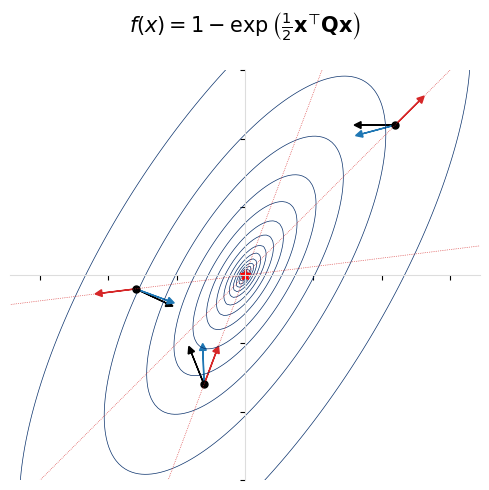

In [152]:
# Newton's method and Gradient Descent
Q = np.array([[5, 1],
              [1, 2]])
b = np.array([[-2, -1]])
c = 3

def f1(x1, x2): return 0.5 * (Q[0, 0] * x1**2 + (Q[1, 0] + Q[0, 1]) * x1 * x2 + Q[1, 1] * x2**2) + b[0, 0] * x1 + b[0, 1] * x2 + c
def grad1(x): return Q @ x + b.T
def hess1(x): return Q

# Minimum
xmin = np.linalg.solve(Q, -b.T)


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Generate data for plotting
x1 = np.linspace(-6, 6, 500)
x2 = np.linspace(-6, 6, 500)
X1, X2 = np.meshgrid(x1, x2)
f2 = aladaopt.FlippedGaussian(xmin=np.array([0, 0]),
                              Q=np.linalg.inv(np.array([[1, 1], [1, 2]])))
Z = f2.func(X1, X2)

contours = ax.contour(X1, X2, Z, levels=np.logspace(-5, 5, 40),
                      cmap='Blues_r', linewidths=0.5)
ax.plot(0, 0, 'r*', markersize=8)
ax.axis('equal')

# Pos 1
l = 1.5
_x1 = np.array([[1.1, 1.1]]).T
_g1 = f2.grad(_x1[0, 0], _x1[1, 0])
_g1n = _g1 / np.linalg.norm(_g1)
_H1 = f2.hessian(_x1[0, 0], _x1[1, 0])
_d1 = - np.linalg.solve(_H1, _g1)
_d1n = _d1 / np.linalg.norm(_d1)
_d1lm = - np.linalg.solve(_H1 + l * np.eye(2), _g1)
_d1lmn = _d1lm / np.linalg.norm(_d1lm)
print(np.linalg.norm(_g1), np.linalg.norm(_d1), np.linalg.norm(_d1lm))

# Gradient line
_x = _x1[0, 0] + _g1n[0, 0] * np.array([-30, 30])
_y = _x1[1, 0] + _g1n[1, 0] * np.array([-30, 30])
ax.plot(_x1[0, 0], _x1[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x1[0, 0], _x1[1, 0], 0.25 * -_g1n[0, 0], 0.25 * -_g1n[1, 0],
         head_width=0.05, head_length=0.05, fc='black', ec='black')

# Newton's direction line
_x = _x1[0, 0] + _d1n[0, 0] * np.array([-30, 30])
_y = _x1[1, 0] + _d1n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x1[0, 0], _x1[1, 0], 0.25 * _d1n[0, 0], 0.25 * _d1n[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:red', ec='tab:red')

# LM's direction line
ax.arrow(_x1[0, 0], _x1[1, 0], 0.25 * _d1lmn[0, 0], 0.25 * _d1lmn[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:blue', ec='tab:blue')

# Pos 2
_x2 = np.array([[-0.8, -0.1]]).T
_g2 = f2.grad(_x2[0, 0], _x2[1, 0])
_g2n = _g2 / np.linalg.norm(_g2)
_H2 = f2.hessian(_x2[0, 0], _x2[1, 0])
_d2 = - np.linalg.solve(_H2, _g2)
_d2n = _d2 / np.linalg.norm(_d2)
_d2lm = - np.linalg.solve(_H2 + l * np.eye(2), _g2)
_d2lmn = _d2lm / np.linalg.norm(_d2lm)

# Gradient line
_x = _x2[0, 0] + _g2n[0, 0] * np.array([-30, 30])
_y = _x2[1, 0] + _g2n[1, 0] * np.array([-30, 30])
ax.plot(_x2[0, 0], _x2[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x2[0, 0], _x2[1, 0], 0.25 * -_g2n[0, 0], 0.25 * -_g2n[1, 0],
         head_width=0.05, head_length=0.05, fc='black', ec='black')

# Newton's direction line
_x = _x2[0, 0] + _d2n[0, 0] * np.array([-30, 30])
_y = _x2[1, 0] + _d2n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x2[0, 0], _x2[1, 0], 0.25 * _d2n[0, 0], 0.25 * _d2n[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:red', ec='tab:red')

# LM's direction line
ax.arrow(_x2[0, 0], _x2[1, 0], 0.25 * _d2lmn[0, 0], 0.25 * _d2lmn[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:blue', ec='tab:blue')

# Pos 3
_x3 = np.array([[-0.3, -0.8]]).T
_g3 = f2.grad(_x3[0, 0], _x3[1, 0])
_g3n = _g3 / np.linalg.norm(_g3)
_H3 = f2.hessian(_x3[0, 0], _x3[1, 0])
_d3 = - np.linalg.solve(_H3, _g3)
_d3n = _d3 / np.linalg.norm(_d3)
_d3lm = - np.linalg.solve(_H3 + l * np.eye(2), _g3)
_d3lmn = _d3lm / np.linalg.norm(_d3lm)

# Gradient line
_x = _x3[0, 0] + _g3n[0, 0] * np.array([-30, 30])
_y = _x3[1, 0] + _g3n[1, 0] * np.array([-30, 30])
ax.plot(_x3[0, 0], _x3[1, 0], 'black', marker='o', markersize=5)
ax.arrow(_x3[0, 0], _x3[1, 0], 0.25 * -_g3n[0, 0], 0.25 * -_g3n[1, 0],
         head_width=0.05, head_length=0.05, fc='black', ec='black')

# Newton's direction line
_x = _x3[0, 0] + _d3n[0, 0] * np.array([-30, 30])
_y = _x3[1, 0] + _d3n[1, 0] * np.array([-30, 30])
ax.plot(_x, _y, 'tab:red', lw=0.5, linestyle=':')
ax.arrow(_x3[0, 0], _x3[1, 0], 0.25 * _d3n[0, 0], 0.25 * _d3n[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:red', ec='tab:red')

# LM's direction line
ax.arrow(_x3[0, 0], _x3[1, 0], 0.25 * _d3lmn[0, 0], 0.25 * _d3lmn[1, 0],
         head_width=0.05, head_length=0.05, fc='tab:blue', ec='tab:blue')

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

# x and y limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xticklabels([])
ax.set_yticklabels([])

# Title
ax.set_title(r'$f(x) = 1 - \exp \left(\frac{1}{2}\mathbf{x}^\top\mathbf{Q}\mathbf{x}\right)$' + '\n ',
             fontsize=15)

plt.tight_layout()

fig.savefig('newton_vs_lm_vs_gradient_descent.png', dpi=300, bbox_inches='tight')
fig.savefig('newton_vs_lm_vs_gradient_descent.pdf', dpi=300, bbox_inches='tight')

In [124]:
print(np.linalg.eig(_H2)[0])
print(np.linalg.eig(_H2 + 1.148 * np.eye(2))[0])

[-1.14722844  0.07945044]
[7.71555463e-04 1.22745044e+00]


In [125]:
print(np.linalg.eig(_H1)[0])
print(np.linalg.eig(_H1 + 0.5 * np.eye(2))[0])

[-0.0603398   1.03781302]
[0.4396602  1.53781302]


In [122]:
print(-_g2n)
_t = np.linalg.solve(_H2 + 1.148 * np.eye(2), -_g2)
print(_t / np.linalg.norm(_t))

[[ 0.87250602]
 [-0.48860337]]
[[ 0.88024456]
 [-0.47452029]]


In [123]:
np.linalg.eig(_H2)[0]

array([-1.14722844,  0.07945044])

In [131]:
np.linalg.inv(_H2 + 1 * np.eye(2)) @ _g2

array([[ 3.51468048],
       [-1.88470325]])